In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df = pd.read_csv('costa.csv')

In [18]:
df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [19]:
numerical = []
categorical =[]

for feature in df.columns:
    if df[feature].dtype == object:
        categorical.append(feature)
    else:
        numerical.append(feature)
        
df[categorical].head()
    

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [20]:
df = df.drop(['Id','idhogar'],axis=1)

In [22]:
df['edjefe'].replace('no',0,inplace=True)
df['edjefe'].replace('yes',1,inplace=True)

df['edjefa'].replace('no',0,inplace=True)
df['edjefa'].replace('yes',1,inplace=True)

df['dependency'].replace('no',0,inplace=True)
df['dependency'].replace('yes',1,inplace=True)





In [24]:
df['edjefe'].dtype

dtype('O')

In [25]:
df['edjefa'].dtype

dtype('O')

In [26]:
df['dependency'].dtype

dtype('O')

In [27]:
df['edjefe'] = df['edjefe'].astype(str).astype(int)

In [28]:
df['edjefe'].dtype

dtype('int32')

In [34]:
df['edjefa'] = df['edjefa'].astype(str).astype(int)

In [35]:
df['edjefa'].dtype

dtype('int32')

In [37]:
df['dependency'] = df['dependency'].astype(str).astype(float)

In [41]:
df[numerical].isnull().sum().sort_values(ascending=False).head(10)

rez_esc            7928
v18q1              7342
v2a1               6860
meaneduc              5
SQBmeaned             5
techoentrepiso        0
techocane             0
techootro             0
cielorazo             0
abastaguadentro       0
dtype: int64

In [43]:
df[['rez_esc','v18q1','v2a1','meaneduc','SQBmeaned']].describe()

,rez_esc,v18q1,v2a1,meaneduc,SQBmeaned
count,1629.000000,2215.000000,2.697000e+03,9552.000000,9552.000000
mean,0.459791,1.404063,1.652316e+05,9.231523,102.588867
std,0.946550,0.763131,1.504571e+05,4.167694,93.516890
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,1.000000,8.000000e+04,6.000000,36.000000
50%,0.000000,1.000000,1.300000e+05,9.000000,81.000000
75%,1.000000,2.000000,2.000000e+05,11.600000,134.560010
max,5.000000,6.000000,2.353477e+06,37.000000,1369.000000


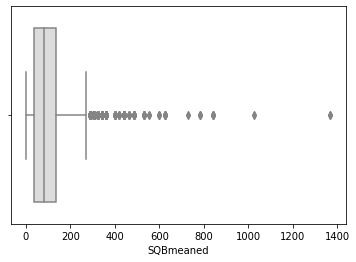

In [44]:
sns.boxplot(x='SQBmeaned',data=df,palette='coolwarm')

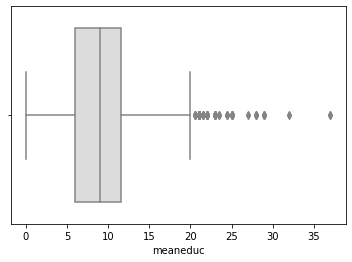

In [45]:
sns.boxplot(x='meaneduc',data=df,palette='coolwarm')

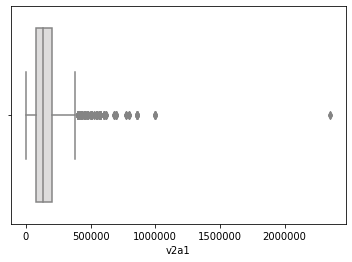

In [46]:
sns.boxplot(x='v2a1',data=df,palette='coolwarm')

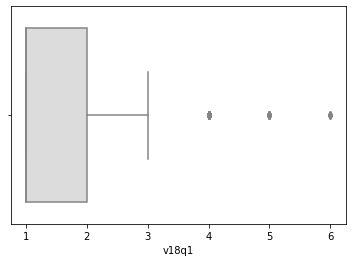

In [47]:
sns.boxplot(x='v18q1',data=df,palette='coolwarm')

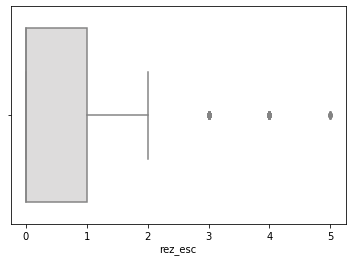

In [48]:
sns.boxplot(x='rez_esc',data=df,palette='coolwarm')

In [50]:
df['rez_esc'].fillna(df['rez_esc'].median(),inplace=True)
df['rez_esc'].fillna(df['v18q1'].mean(),inplace=True)
df['rez_esc'].fillna(df['v2a1'].mean(),inplace=True)
df['rez_esc'].fillna(df['meaneduc'].mean(),inplace=True)
df['rez_esc'].fillna(df['SQBmeaned'].mean(),inplace=True)

In [56]:
target_values = df['Target'].value_counts(ascending=True)
target_values

1     755
3    1209
2    1597
4    5996
Name: Target, dtype: int64